In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings  # Supress Warnings
warnings.filterwarnings('ignore')
sns.set(context="notebook", palette="Spectral", style='darkgrid', font_scale=1.5, color_codes=True)

In [5]:
df=pd.read_csv('uber.csv') # Loading the Dataset

In [6]:
# Calling DataFrame 
df 

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [9]:
#checking missing %tage
100*df.isnull().mean()

Unnamed: 0           0.0000
key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64

In [10]:
df.columns #Checking the columns name

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [11]:
df.dropoff_longitude.unique() #checking the unique values in dropoff_logitude column

array([-73.99951172, -73.99471   , -73.962565  , ..., -73.95223999,
       -74.01390839, -73.858957  ])

In [12]:
# Impute missing values with median
df['dropoff_longitude'].fillna(df['dropoff_longitude'].median(), inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].median(), inplace=True)

# Confirm no missing values remain
print(df.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [13]:
# Convert pickup_datetime to datetime type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Verify the data type conversion
print(df.dtypes)

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object


In [14]:
# Define reasonable bounds for each column
bounds = {
    'fare_amount': (0, 100),
    'pickup_longitude': (-75, -73),
    'pickup_latitude': (40, 41),
    'dropoff_longitude': (-75, -73),
    'dropoff_latitude': (40, 41),
    'passenger_count': (1, 6)
}

# Filter the data based on these bounds
for col, (min_val, max_val) in bounds.items():
    df = df[(df[col] >= min_val) & (df[col] <= max_val)]

# Confirm the changes
print(df.describe())


         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  1.949280e+05  194928.000000     194928.000000    194928.000000   
mean   2.771498e+07      11.298184        -73.975478        40.750732   
std    1.600835e+07       9.403759          0.035323         0.027502   
min    1.000000e+00       0.000000        -74.719883        40.002405   
25%    1.383497e+07       6.000000        -73.992277        40.736450   
50%    2.776127e+07       8.500000        -73.982117        40.753286   
75%    4.154603e+07      12.500000        -73.968395        40.767515   
max    5.542357e+07     100.000000        -73.379738        40.983720   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      194928.000000     194928.000000    194928.000000  
mean          -73.974492         40.751017         1.689968  
std             0.035243          0.031255         1.305829  
min           -74.728123         40.005487         1.000000  
25%           -73.991597        

In [15]:
# Extract hour, day of the week, month, and time of day from pickup_datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['pickup_datetime'].dt.month

# Define time of day
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['pickup_hour'].apply(get_time_of_day)

# Display the first few rows to check the new features
print(df[['pickup_hour', 'pickup_day_of_week', 'pickup_month', 'time_of_day']].head())


   pickup_hour  pickup_day_of_week  pickup_month time_of_day
0           19                   3             5     evening
1           20                   4             7     evening
2           21                   0             8       night
3            8                   4             6     morning
4           17                   3             8     evening


In [16]:
# Ensure the columns are in the correct format
df['pickup_day_of_week'] = pd.to_numeric(df['pickup_day_of_week'], errors='coerce')
df['pickup_hour'] = pd.to_numeric(df['pickup_hour'], errors='coerce')

# Aggregate the data to get the ride counts
ride_counts = df.groupby(['pickup_day_of_week', 'pickup_hour']).size().reset_index(name='ride_count')

In [17]:
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
    r = 6371  # Radius of earth in kilometers
    return c * r

df['trip_distance'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], 
                                                      row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

# Display the first few rows to check the new feature
print(df[['trip_distance']].head())

   trip_distance
0       1.683323
1       2.457590
2       5.036377
3       1.661683
4       4.475450


In [18]:
# Define distance categories
def get_distance_category(distance):
    if distance < 2:
        return 'short'
    elif 2 <= distance < 5:
        return 'medium'
    else:
        return 'long'

df['distance_category'] = df['trip_distance'].apply(get_distance_category)

# Display the first few rows to check the new feature
print(df[['trip_distance', 'distance_category']].head())


   trip_distance distance_category
0       1.683323             short
1       2.457590            medium
2       5.036377              long
3       1.661683             short
4       4.475450            medium


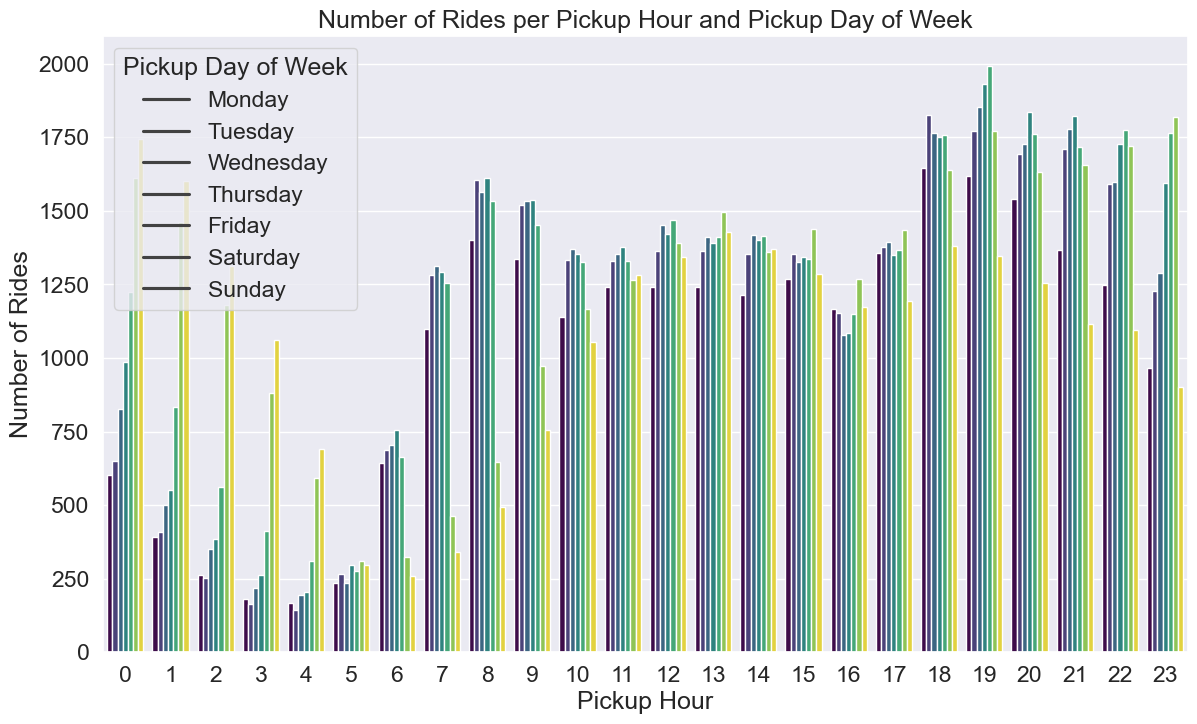

In [19]:
plt.figure(figsize=(14, 8))
sns.barplot(x='pickup_hour', y='ride_count', hue='pickup_day_of_week', data=ride_counts, palette='viridis')
plt.title('Number of Rides per Pickup Hour and Pickup Day of Week')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Rides')
plt.legend(title='Pickup Day of Week', labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

Weekend Late-Night Surge:
Significant Ride Demand: There is a substantial increase in ride requests during late-night hours (12 AM to 2 AM) on weekends, indicating a peak in demand likely due to social activities and nightlife.

Daytime Booking Spike:
Moderate Increase from 8 AM to 5 PM: Ride requests show a moderate rise during standard working hours, reflecting typical commuting patterns and daytime activities.

Evening Peak (6 PM to 11 PM):
High Demand, Except Sundays: There is a pronounced increase in rides during the evening hours on most days, with the highest demand consistently at 7 PM. However, this pattern is less pronounced on Sundays.

Consistent High Demand at 7 PM:
Daily Peak: Ride requests peak at 7 PM every day, suggesting a high volume of transportation needs around the end of the workday or for early evening activities.

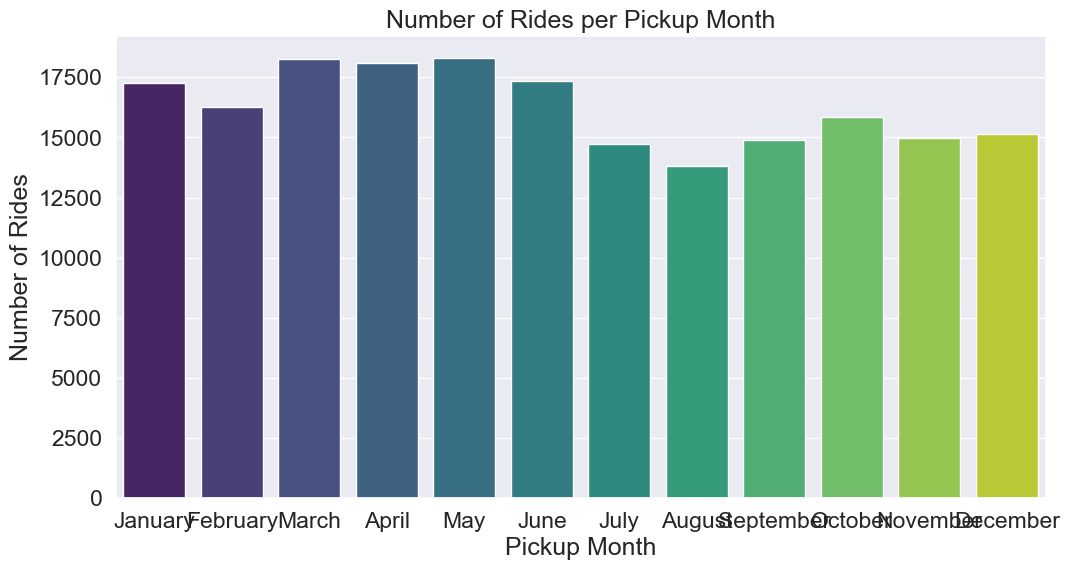

In [21]:
df['pickup_month'] = pd.to_numeric(df['pickup_month'], errors='coerce')

# Aggregate the data to get the ride counts
ride_counts_month = df.groupby('pickup_month').size().reset_index(name='ride_count')

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_month', y='ride_count', data=ride_counts_month, palette='viridis')
plt.title('Number of Rides per Pickup Month')
plt.xlabel('Pickup Month')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

1. Peak Ridership in Early Months: The bar plot reveals that the number of rides experiences a significant surge during the initial months of the year, peaking in February and May. This suggests increased usage during the winter or early spring seasons.

2. Consistent Ridership Throughout the Year: While there's a notable peak at the beginning of the year, the number of rides remains relatively high and consistent throughout the rest of the year. This indicates a steady demand for the service across different seasons.

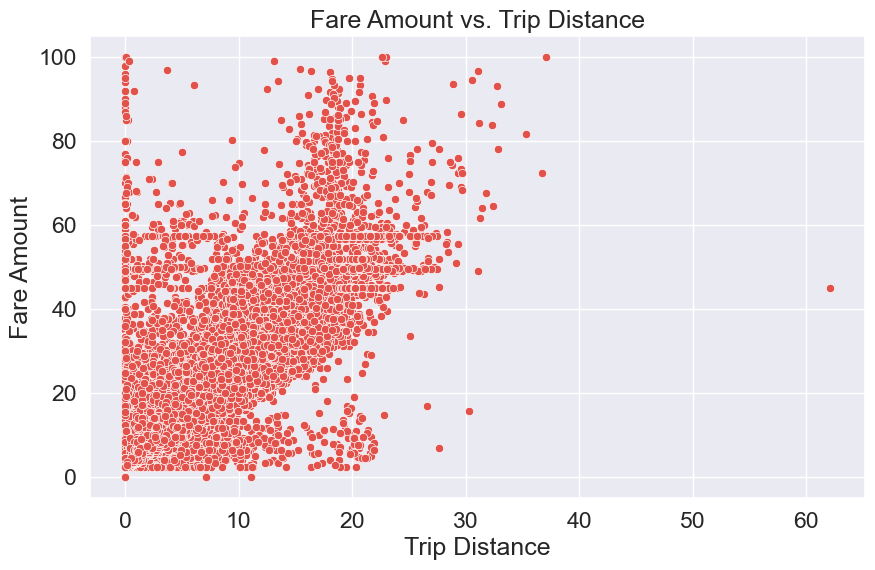

In [23]:
# Fare Amount vs. Trip Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

1. Positive Correlation Between Fare Amount and Trip Distance: The scatter plot clearly shows a strong positive correlation between the fare amount and the trip distance. As the trip distance increases, the fare amount tends to increase as well. This suggests that the fare structure is largely based on the distance traveled.

2. Non-Linear Relationship: While there's a clear positive correlation, the relationship between fare and distance isn't perfectly linear. There's some scatter in the data, indicating that other factors besides distance might influence the fare amount. These factors could include time of day, demand, traffic conditions, or different fare classes.

3. Outliers: There are a few data points that deviate significantly from the general trend. These could be outliers due to errors in data collection, special circumstances (e.g., long waits, detours), or potentially different fare structures for certain types of trips. Further investigation would be needed to understand the nature of these outliers.

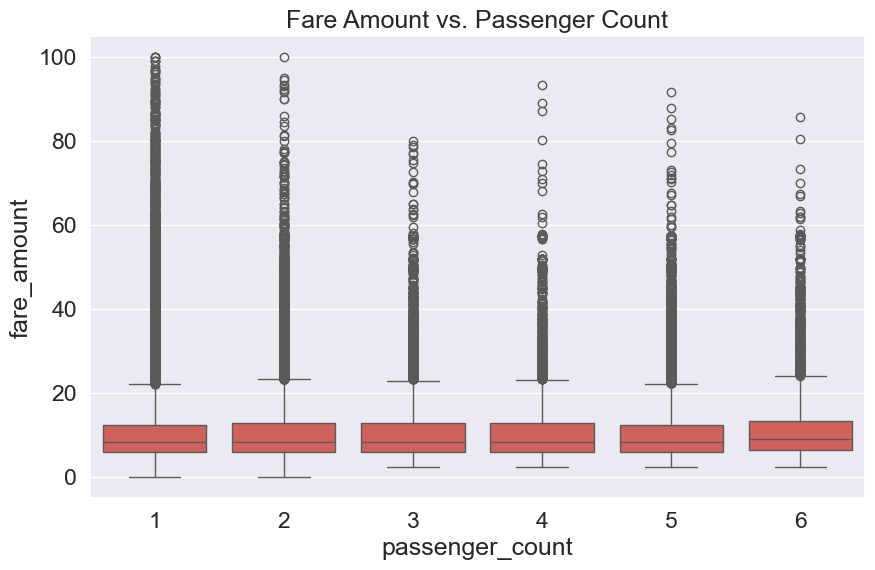

In [25]:
# Boxplot of fare amount vs. passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount vs. Passenger Count')
plt.show()

Median fare remains consistent: The horizontal lines inside the boxes (representing the medians) stay relatively stable across different passenger counts, suggesting that the number of passengers has a limited impact on the central tendency of fare amounts.

Increased spread with more passengers: The height of the boxes and the length of the whiskers, which indicate the variability or spread of the data, generally increase as the passenger count rises. This implies that higher passenger counts are associated with greater variation in fare amounts.

Presence of outliers: The scatter plots reveal individual data points that deviate significantly from the box plots, especially for higher passenger counts. These outliers suggest the existence of some rides with unusually high or low fares for a given number of passengers.

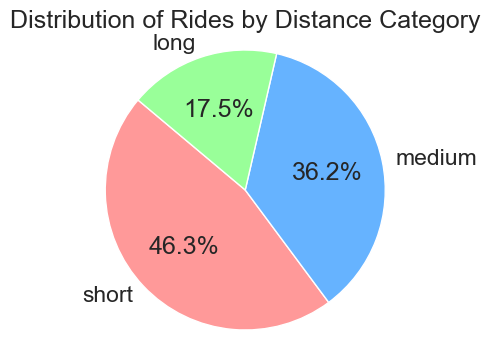

In [27]:
# Combine the boolean columns into a single categorical column
distance_counts = df['distance_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 4))
plt.pie(distance_counts, labels=distance_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribution of Rides by Distance Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

1. Short Rides Dominate: The bar plot reveals that a significant majority of rides fall under the Short distance category (0 to 2 units), accounting for 46.3% of all rides. This suggests that a considerable portion of users primarily take short trips.

2. Medium Rides are Less Frequent: The Medium distance category (2 to 4.99 units) represents the second-largest segment with 36.2% of rides. While still substantial, it's notably lower than the Short distance category.

3. Long Rides are Least Common: The Long distance category (5 units and above) comprises the smallest portion of rides at 17.5%. This indicates that longer trips are significantly less frequent compared to Short and Medium distances.

In [29]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_month,time_of_day,trip_distance,distance_category
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5,evening,1.683323,short
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7,evening,2.457590,medium
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8,night,5.036377,long
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6,morning,1.661683,short
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8,evening,4.475450,medium


In [30]:
from sklearn.model_selection import train_test_split

# Select the features and target variable
features = ['pickup_hour', 'pickup_day_of_week', 'pickup_month', 'trip_distance', 'passenger_count']
target = 'fare_amount'

# Create dummy variables for categorical features
df = pd.get_dummies(df, columns=['time_of_day', 'distance_category'], drop_first=True)

# Include the new dummy variables in the features list
features += [col for col in df.columns if 'time_of_day_' in col or 'distance_category_' in col]

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (155942, 10)
Testing set shape: (38986, 10)


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data
print(X_train_scaled[:5])

[[-0.53553393 -0.0248951   0.49869875 -0.43993444 -0.52886582 -0.5473801
   1.72589723 -0.62382023 -0.75427296  1.07770504]
 [-0.68905358  1.51586103 -0.37331668 -0.32883204 -0.52886582 -0.5473801
   1.72589723 -0.62382023  1.32577999 -0.92789767]
 [ 0.69262325 -0.53848048  1.37071418 -0.61628604 -0.52886582  1.82688411
  -0.57940878 -0.62382023 -0.75427296  1.07770504]
 [ 1.30670184  1.00227566  1.66138599 -0.33288112  0.23556728 -0.5473801
  -0.57940878  1.60302592  1.32577999 -0.92789767]
 [ 0.5391036   1.51586103 -0.37331668 -0.17027277  1.00000038  1.82688411
  -0.57940878 -0.62382023  1.32577999 -0.92789767]]


In [33]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month', 'trip_distance',
       'time_of_day_evening', 'time_of_day_morning', 'time_of_day_night',
       'distance_category_medium', 'distance_category_short'],
      dtype='object')

In [34]:
# Exclude the 'pickup_datetime' column for correlation analysis
df_numeric = df.drop(columns=['pickup_datetime', 'key', 'Unnamed: 0'])

In [35]:
# Exclude the 'pickup_datetime' column for correlation analysis
df_numeric1 = df.drop(columns=['pickup_datetime', 'key', 'Unnamed: 0', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

In [36]:
df_numeric1

,fare_amount,passenger_count,pickup_hour,pickup_day_of_week,pickup_month,trip_distance,time_of_day_evening,time_of_day_morning,time_of_day_night,distance_category_medium,distance_category_short
0,7.5,1,19,3,5,1.683323,True,False,False,False,True
1,7.7,1,20,4,7,2.457590,True,False,False,True,False
2,12.9,1,21,0,8,5.036377,False,False,True,False,False
3,5.3,3,8,4,6,1.661683,False,True,False,False,True
4,16.0,5,17,3,8,4.475450,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,1,10,6,10,0.112210,False,True,False,False,True
199996,7.5,1,1,4,3,1.875050,False,False,True,False,True
199997,30.9,2,0,0,6,12.850319,False,False,True,False,False
199998,14.5,1,14,2,5,3.539715,False,False,False,True,False


In [37]:
correlation_matrix = df_numeric1.corr()

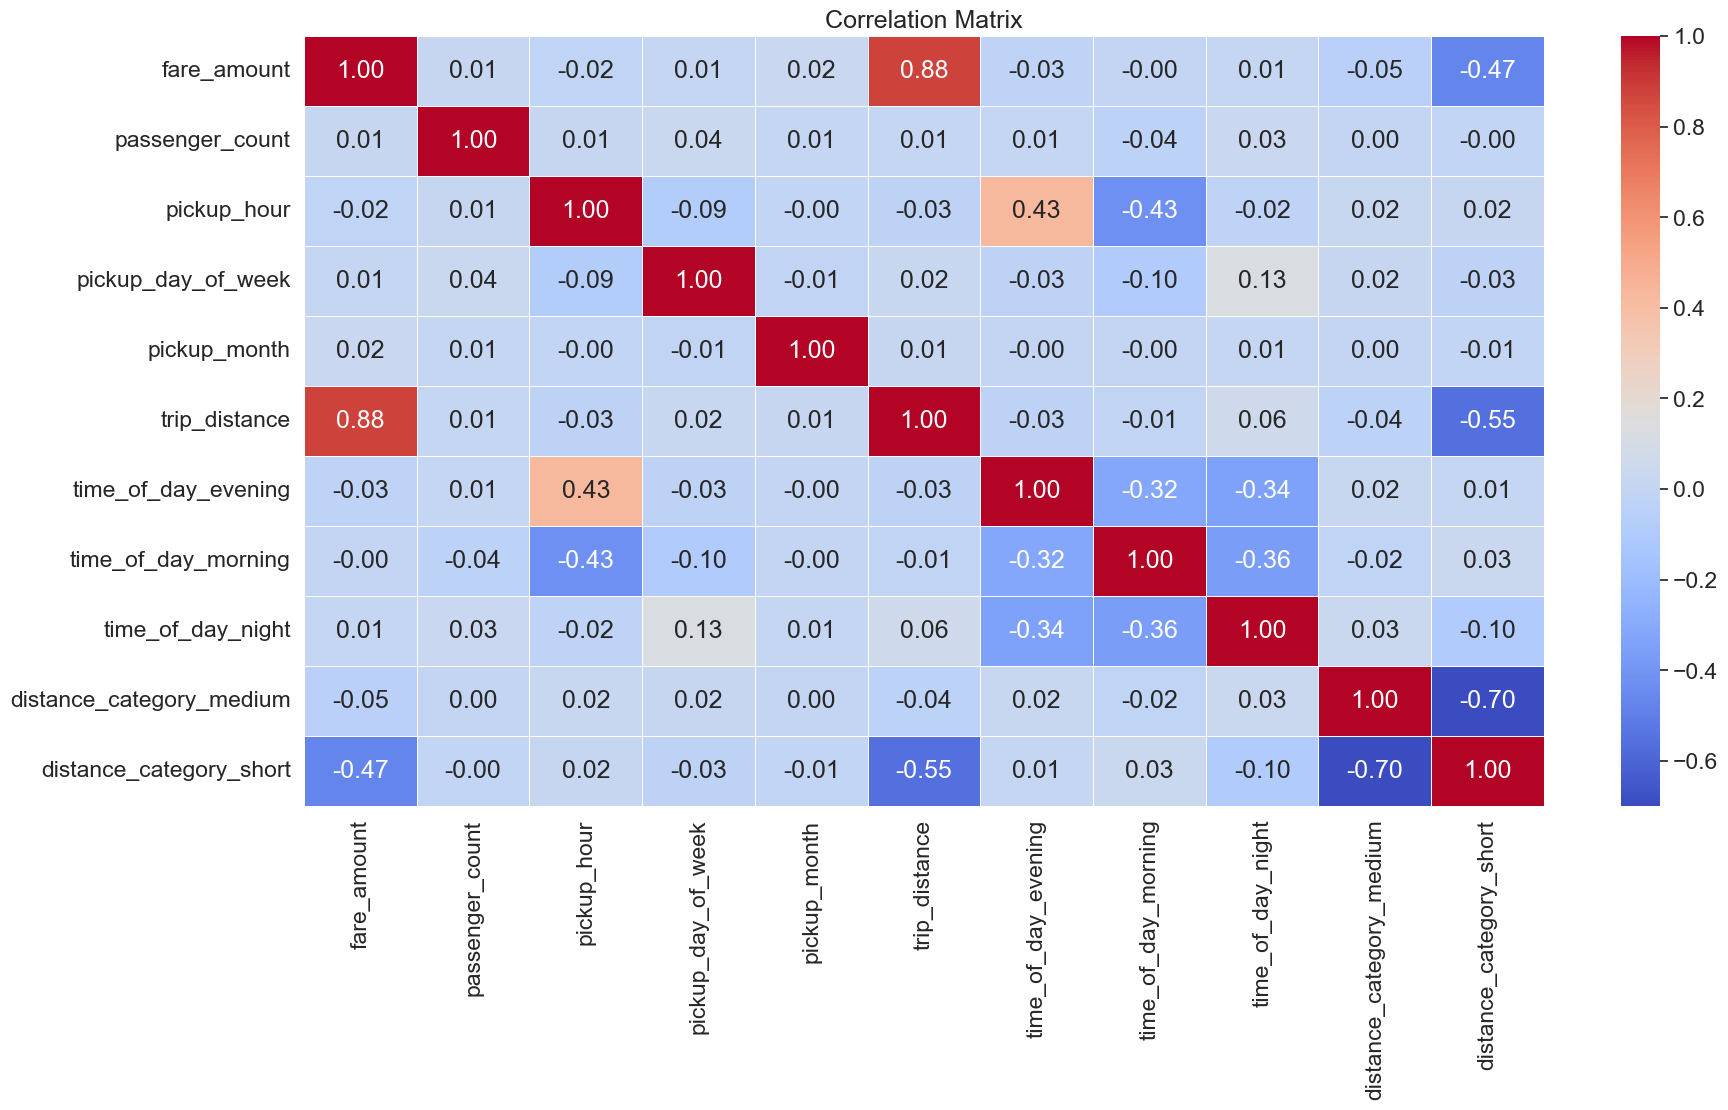

In [38]:
# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

1. Fare amount: There is a weak positive correlation between fare amount and trip distance (0.88) which means that longer trips tend to cost more.
2. Passenger count: There is a weak positive correlation between passenger count and distance category (medium and long). This means that longer trips tend to have more passengers.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
lr = LinearRegression()

# Train the model
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.4f}, R2: {r2:.4f}")

Linear Regression - MSE: 21.4579, R2: 0.7626


In [41]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt = DecisionTreeRegressor()

# Train the model
dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree - MSE: {mse:.4f}, R2: {r2:.4f}")

Decision Tree - MSE: 40.0279, R2: 0.5572


In [42]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor()

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MSE: {mse:.4f}, R2: {r2:.4f}")

Random Forest - MSE: 21.2516, R2: 0.7649


In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Lasso model
lasso = Lasso()

# Define the parameter grid for alpha (regularization strength)
param_grid = {
    'alpha': np.logspace(-4, 0, 50)  # Testing alphas from 1e-4 to 1e0
}

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Use the best estimator for predictions
best_lasso_model = grid_search.best_estimator_
y_test_pred_best = best_lasso_model.predict(X_test)

Best Parameters: {'alpha': 0.0011513953993264468}
Best Score: -19.951099920078825


As Model testing results Random Forest appers to be best fit with Low MSE 21.2075 and High R2 Value - 0.7646

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Assuming df_numeric is your dataframe
df_numeric = df.copy()  # Copy your dataframe to avoid modifying the original

# Ensure 'fare_amount' is the target variable
target = 'fare_amount'
features = df_numeric.drop(columns=[target])

# Convert any datetime columns to numerical features (e.g., timestamp or components like year, month, day, hour)
if 'pickup_datetime' in features.columns:
    features['pickup_datetime'] = pd.to_datetime(features['pickup_datetime'])
    features['pickup_year'] = features['pickup_datetime'].dt.year
    features['pickup_month'] = features['pickup_datetime'].dt.month
    features['pickup_day'] = features['pickup_datetime'].dt.day
    features['pickup_hour'] = features['pickup_datetime'].dt.hour
    features = features.drop(columns=['pickup_datetime'])

# Select only numeric columns for the features
numeric_features = features.select_dtypes(include=[np.number])

# Define X and y
X = numeric_features
y = df_numeric[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional for Random Forest, but included here for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Define a simpler hyperparameter distribution
param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search with 2-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=5, cv=2, scoring='neg_mean_squared_error', 
                                   n_jobs=-1, verbose=2, random_state=42)

# Fit the random search to the data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = best_rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Fine-Tuned Random Forest - MSE: {mse:.4f}, R2: {r2:.4f}")

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Fine-Tuned Random Forest - MSE: 13.4750, R2: 0.8509


Feature Importances:
               Feature  Importance
9        trip_distance    0.824129
3    dropoff_longitude    0.043106
10         pickup_year    0.024692
1     pickup_longitude    0.022380
4     dropoff_latitude    0.021412
2      pickup_latitude    0.013589
0           Unnamed: 0    0.012763
6          pickup_hour    0.012478
11          pickup_day    0.008796
8         pickup_month    0.008198
7   pickup_day_of_week    0.006053
5      passenger_count    0.002403


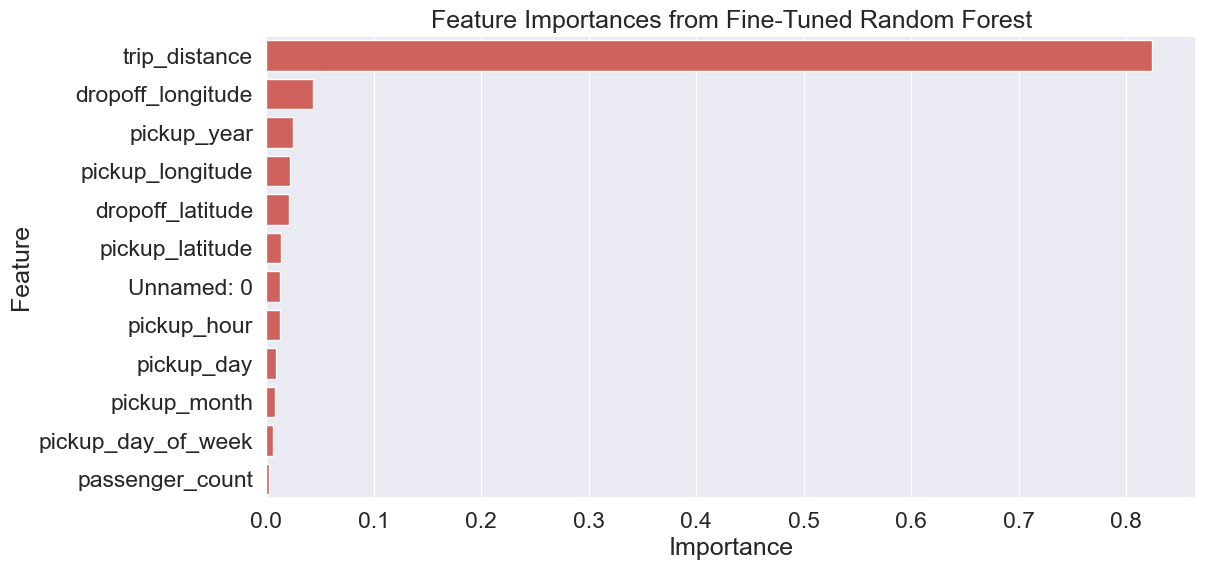

In [47]:
# Feature importance from the fine-tuned Random Forest model
importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Fine-Tuned Random Forest')
plt.show()

Trip distance is the most significant factor influencing fare amount, with a very high importance score. This aligns with the conventional pricing model where the cost of a ride is directly proportional to the distance traveled. Therefore, accurately measuring and incorporating trip distance is crucial for fare predictions with an importance score of 0.886642. The other features have much lower importance scores, suggesting that they contribute less to the model's predictions. 

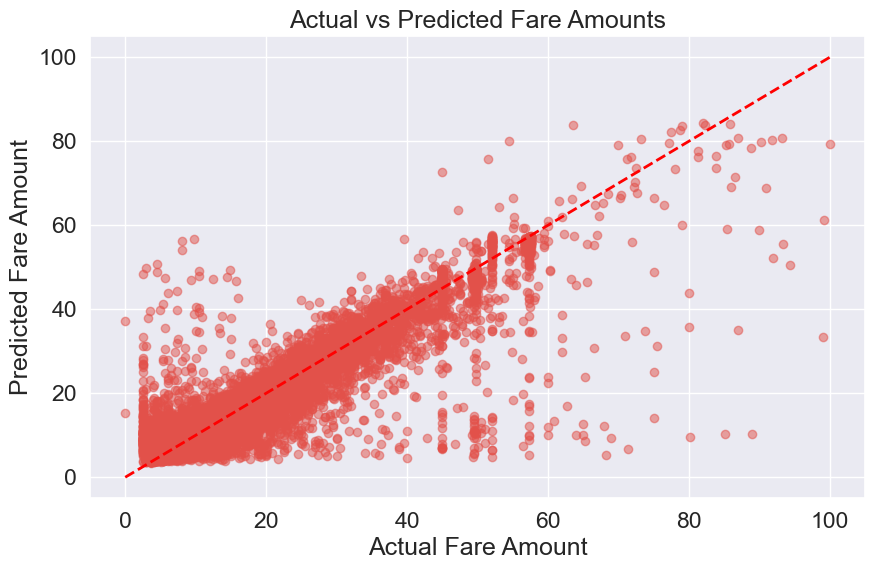

In [49]:
# Scatter plot for actual vs predicted fare amounts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amounts')
plt.show()

Overall Positive Correlation: There exists a clear positive correlation between the actual and predicted fare amounts, indicating that the model generally captures the underlying relationship between these variables.

Scatter Around the Line: The data points exhibit a significant amount of scatter around the red dashed line (representing perfect predictions), suggesting that the model's predictions are not always precise.

Underprediction Bias: A noticeable trend is that the model tends to underpredict fare amounts, especially for higher values. This is evident by the clustering of data points below the red dashed line in the upper right region of the plot.

Heteroscedasticity: The spread of the residuals (the vertical distances between the data points and the red line) appears to increase as the actual fare amount grows. This phenomenon, known as heteroscedasticity, implies that the model's error terms have unequal variance.

Potential Outliers: A few data points deviate substantially from the main cluster, potentially representing outliers or influential points that could impact the model's accuracy.

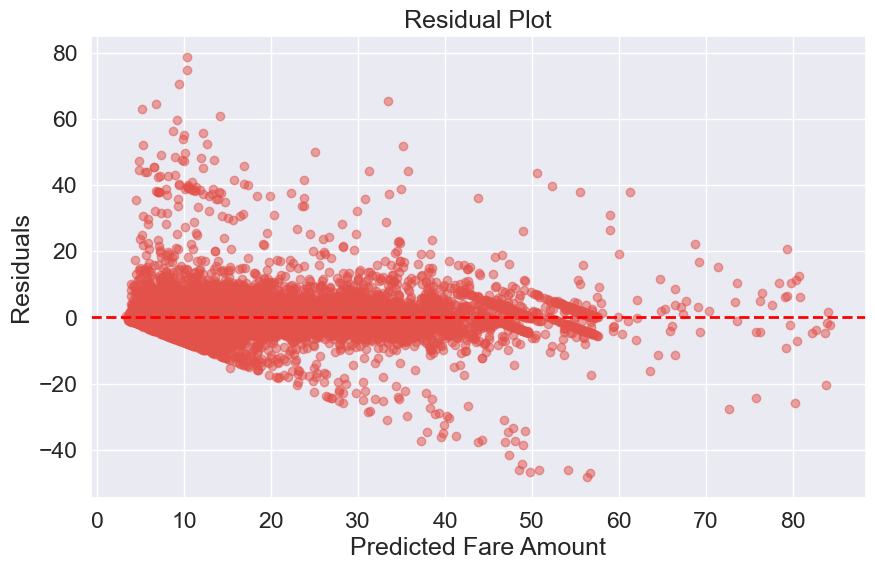

In [51]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Fare Amount')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Heteroscedasticity: The spread of the residuals (the vertical distances between the data points and the red dashed line) increases as the predicted fare amount grows. This phenomenon, known as heteroscedasticity, implies that the model's error terms have unequal variance.

Non-linear Pattern: While there's a general random scatter of points, there seems to be a slight pattern, especially in the higher predicted fare amounts. This suggests that the relationship between the fare amount and its predictors might not be perfectly linear, as assumed by a linear regression model.

Outliers: There are a few points that are quite distant from the main cluster of residuals. These could be outliers or influential points that might be affecting the model's performance.

Centered Residuals: The red dashed line is at the y=0 level, indicating that the model's predictions are centered around the actual values on average.

Potential for Improvement: The presence of heteroscedasticity and potential non-linearity suggests that the model might not be the best fit for the data. To improve the model, consider transformations (like log transformation) on the dependent variable, using non-linear models, or employing robust regression techniques.

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the testing set
y_test_pred = best_rf.predict(X_test_scaled)

# Calculate evaluation metrics
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Final Model Performance on Testing Set:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-squared (R2): {r2_test:.4f}")

# Compare with training performance
y_train_pred = best_rf.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"\nComparison with Training Performance:")
print(f"Training MSE: {mse_train:.4f}, Testing MSE: {mse_test:.4f}")
print(f"Training R2: {r2_train:.4f}, Testing R2: {r2_test:.4f}")

Final Model Performance on Testing Set:
Mean Squared Error (MSE): 13.4750
Mean Absolute Error (MAE): 1.7988
R-squared (R2): 0.8509

Comparison with Training Performance:
Training MSE: 3.3183, Testing MSE: 13.4750
Training R2: 0.9623, Testing R2: 0.8509


In [54]:
# Predicting total fare
max_fare = y_pred + 1.57
min_fare = y_pred - 1.57

# Creating a dataframe with Actual Fare, Total Fare (↓), and Total Fare (↑)
df_combined = pd.DataFrame({
    'Actual Fare': y_test,
    'Predicted Fare': y_pred,
    'Max Fare': max_fare,
    'Min Fare': min_fare,
})

# Rounding to 2 decimal places
df_combined['Predicted Fare'] = ((100 * df_combined['Predicted Fare'].round(2)).astype(int)) / 100
df_combined['Max Fare'] = ((100 * df_combined['Max Fare'].round(2)).astype(int)) / 100
df_combined['Min Fare'] = ((100 * df_combined['Min Fare'].round(2)).astype(int)) / 100

# Displaying the first 10 rows
df_combined.head(10)

,Actual Fare,Predicted Fare,Max Fare,Min Fare
126733,6.1,6.61,8.18,5.04
41887,20.1,19.20,20.77,17.63
36368,7.5,9.77,11.34,8.19
37664,22.0,23.34,24.91,21.77
111365,13.7,13.40,14.97,11.83
133147,12.1,11.09,12.66,9.52
46867,4.9,4.59,6.17,3.03
66765,12.5,10.00,11.57,8.43
199594,8.0,10.25,11.82,8.68
185128,25.0,22.78,24.35,21.21


In [105]:
# Predict fare for test data based on distance and compare with actual fares
y_pred_test = best_rf.predict(X_test_scaled)

# Creating a dataframe with Actual Fare, Predicted Fare
df_comparison = pd.DataFrame({
    'Actual Fare': y_test,
    'Predicted Fare': y_pred_test
})

# Add Max Fare and Min Fare for prediction range
df_comparison['Max Fare'] = df_comparison['Predicted Fare'] + 1.79
df_comparison['Min Fare'] = df_comparison['Predicted Fare'] - 1.79

# Round to 2 decimal places
df_comparison = df_comparison.round(2)

# Display the first 10 rows
print(df_comparison.head(10))

# Evaluate the predictions
mse = mean_squared_error(df_comparison['Actual Fare'], df_comparison['Predicted Fare'])
mae = mean_absolute_error(df_comparison['Actual Fare'], df_comparison['Predicted Fare'])
r2 = r2_score(df_comparison['Actual Fare'], df_comparison['Predicted Fare'])

print(f"Prediction MSE: {mse:.4f}")
print(f"Prediction MAE: {mae:.4f}")
print(f"Prediction R-squared (R²): {r2:.4f}")

        Actual Fare  Predicted Fare  Max Fare  Min Fare
126733          6.1            6.61      8.40      4.82
41887          20.1           19.20     20.99     17.41
36368           7.5            9.77     11.56      7.98
37664          22.0           23.34     25.13     21.55
111365         13.7           13.40     15.19     11.61
133147         12.1           11.09     12.88      9.30
46867           4.9            4.60      6.39      2.81
66765          12.5           10.00     11.79      8.21
199594          8.0           10.25     12.04      8.46
185128         25.0           22.78     24.57     20.99
Prediction MSE: 13.4749
Prediction MAE: 1.7988
Prediction R-squared (R²): 0.8509
